In [20]:
pip install pandas numpy geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
# 0. SETUP

import os
import pandas as pd
import numpy as np

# kalau mau pakai peta di Colab kamu, aktifkan ini
import geopandas as gpd

DATA_DIR = "data_raw"
PROC_DIR = "data_processed"

os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(PROC_DIR, exist_ok=True)

print("Folder siap:", os.listdir(DATA_DIR))

Folder siap: ['3273-kota-bandung-level-kecamatan.json', '3273-kota-bandung-level-kelurahan.json', 'bandung_jumlah_tindak_pidana_2017_2022.csv', 'jabar_kriminalitas_2019_2021.csv']


In [22]:
# 1. BACA DATA MENTAH

# 1a. Data kriminalitas Kota Bandung per jenis
path_jabar  = os.path.join(DATA_DIR, "jabar_kriminalitas_2019_2021.csv")
df_jabar    = pd.read_csv(path_jabar)

print("=== df_jabar (Kota Bandung, per jenis kejahatan) ===")
print("Shape :", df_jabar.shape)
print("Kolom :", df_jabar.columns.tolist())
display(df_jabar.head())

# 1b. Data tindak pidana per desa/kelurahan se-Jawa Barat
path_tindak = os.path.join(DATA_DIR, "bandung_jumlah_tindak_pidana_2017_2022.csv")
df_tindak   = pd.read_csv(path_tindak)

print("\n=== df_tindak (tindak pidana desa/kelurahan) ===")
print("Shape :", df_tindak.shape)
print("Kolom :", df_tindak.columns.tolist())
display(df_tindak.head())

# 1c. GeoJSON Kota Bandung (kecamatan dan kelurahan)
path_kec = os.path.join(DATA_DIR, "3273-kota-bandung-level-kecamatan.json")
path_kel = os.path.join(DATA_DIR, "3273-kota-bandung-level-kelurahan.json")

gdf_kec = gpd.read_file(path_kec)
gdf_kel = gpd.read_file(path_kel)

print("\n=== gdf_kec (shapefile kecamatan Kota Bandung) ===")
print("Shape :", gdf_kec.shape)
print("Kolom :", gdf_kec.columns.tolist())
display(gdf_kec.head())

print("\n=== gdf_kel (shapefile kelurahan Kota Bandung) ===")
print("Shape :", gdf_kel.shape)
print("Kolom :", gdf_kel.columns.tolist())
display(gdf_kel.head())

=== df_jabar (Kota Bandung, per jenis kejahatan) ===
Shape : (156, 9)
Kolom : ['id', 'kode_provinsi', 'nama_provinsi', 'bps_kode_kabupaten_kota', 'bps_nama_kabupaten_kota', 'jenis_kriminalitas', 'jumlah_tindak_pidana', 'satuan', 'tahun']


,id,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,jenis_kriminalitas,jumlah_tindak_pidana,satuan,tahun
0,1,32,JAWA BARAT,3273,KOTA BANDUNG,CURANMOR R-2,355,KASUS,2017
1,2,32,JAWA BARAT,3273,KOTA BANDUNG,CURANMOR R-4,62,KASUS,2017
2,3,32,JAWA BARAT,3273,KOTA BANDUNG,CURI BERAT,369,KASUS,2017
3,4,32,JAWA BARAT,3273,KOTA BANDUNG,CURI KERAS,178,KASUS,2017
4,5,32,JAWA BARAT,3273,KOTA BANDUNG,CURI BIASA,165,KASUS,2017



=== df_tindak (tindak pidana desa/kelurahan) ===
Shape : (15936, 23)
Kolom : ['kode_provinsi', 'nama_provinsi', 'bps_kode_kabupaten_kota', 'bps_nama_kabupaten_kota', 'bps_kode_kecamatan', 'bps_nama_kecamatan', 'bps_kode_desa_kelurahan', 'bps_nama_desa_kelurahan', 'kemendagri_kode_kecamatan', 'kemendagri_nama_kecamatan', 'kemendagri_kode_desa_kelurahan', 'kemendagri_nama_desa_kelurahan', 'terdapat_pencurian', 'terdapat_penipuan', 'terdapat_penganiayaan', 'terdapat_pembakaran', 'terdapat_perkosaan', 'terdapat_pengedar_penyalahgunaan_narkoba', 'terdapat_perjudian', 'terdapat_pembunuhan', 'terdapat_perdagangan_manusia', 'tahun', 'id']


,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,...,terdapat_penipuan,terdapat_penganiayaan,terdapat_pembakaran,terdapat_perkosaan,terdapat_pengedar_penyalahgunaan_narkoba,terdapat_perjudian,terdapat_pembunuhan,terdapat_perdagangan_manusia,tahun,id
0,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,WANAHERANG,32.01.02,GUNUNG PUTRI,...,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,2019.0,1
1,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,BOJONG KULUR,32.01.02,GUNUNG PUTRI,...,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,2019.0,2
2,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,CIANGSANA,32.01.02,GUNUNG PUTRI,...,ADA,ADA,TIDAK ADA,TIDAK ADA,ADA,ADA,TIDAK ADA,TIDAK ADA,2019.0,3
3,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,...,ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,ADA,ADA,TIDAK ADA,TIDAK ADA,2019.0,4
4,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,...,TIDAK ADA,ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,2019.0,5



=== gdf_kec (shapefile kecamatan Kota Bandung) ===
Shape : (30, 5)
Kolom : ['id_wilayah', 'nama_wilayah', 'id_kecamatan', 'nama_kecamatan', 'geometry']


,id_wilayah,nama_wilayah,id_kecamatan,nama_kecamatan,geometry
0,7D00F8E4,Bojonagara,3273180,Andir,"POLYGON ((107.57614 -6.90608, 107.57635 -6.906..."
1,B3D12B15,Arcamanik,3273141,Antapani,"POLYGON ((107.66799 -6.92727, 107.66797 -6.927..."
2,B3D12B15,Arcamanik,3273130,Arcamanik,"POLYGON ((107.68684 -6.91764, 107.68684 -6.917..."
3,CC7B08F0,Tegallega,3273050,Astanaanyar,"POLYGON ((107.59937 -6.93455, 107.59938 -6.934..."
4,CC7B08F0,Tegallega,3273020,Babakan Ciparay,"POLYGON ((107.58138 -6.92354, 107.58135 -6.923..."



=== gdf_kel (shapefile kelurahan Kota Bandung) ===
Shape : (151, 10)
Kolom : ['id_wilayah', 'nama_wilayah', 'id_kecamatan', 'nama_kecamatan', 'id_kelurahan', 'nama_kelurahan', 'kodepos', 'jumlah_rt', 'jumlah_rw', 'geometry']


,id_wilayah,nama_wilayah,id_kecamatan,nama_kecamatan,id_kelurahan,nama_kelurahan,kodepos,jumlah_rt,jumlah_rw,geometry
0,5F142D26,Ujungberung,3273111,Panyileukan,3273111001,Mekar Mulya,40614,35,6,"POLYGON ((107.69425 -6.92924, 107.69428 -6.929..."
1,5F142D26,Ujungberung,3273111,Panyileukan,3273111003,Cipadung Wetan,40614,19,6,"POLYGON ((107.71025 -6.92694, 107.71103 -6.927..."
2,5F142D26,Ujungberung,3273111,Panyileukan,3273111002,Cipadung Kidul,40614,78,14,"POLYGON ((107.7158 -6.94571, 107.71567 -6.9456..."
3,5F142D26,Ujungberung,3273120,Ujungberung,3273120007,Pasir Endah,40619,49,7,"POLYGON ((107.6863 -6.89986, 107.68634 -6.8997..."
4,5F142D26,Ujungberung,3273120,Ujungberung,3273120005,Pasir Wangi,40618,64,12,"POLYGON ((107.70336 -6.89865, 107.7034 -6.8986..."


In [23]:
# 2. FILTER WILAYAH DAN PREPROCESS

TARGET_REGION = "KABUPATEN BANDUNG"

df_bd = df_tindak.loc[
    df_tindak["bps_nama_kabupaten_kota"] == TARGET_REGION
].copy()

print("=== df_bd (hanya", TARGET_REGION, ") ===")
print("Shape :", df_bd.shape)
display(df_bd.head())

# semua kolom indikator kejahatan diawali "terdapat_"
crime_cols = [c for c in df_bd.columns if c.startswith("terdapat_")]
print("Kolom indikator kriminalitas:", crime_cols)

# mapping teks -> angka
binary_map = {"ADA": 1, "TIDAK ADA": 0}
df_bd[crime_cols] = df_bd[crime_cols].replace(binary_map)

print("\nCek hasil konversi 0/1:")
display(df_bd[crime_cols].head())

=== df_bd (hanya KABUPATEN BANDUNG ) ===
Shape : (810, 23)


,kode_provinsi,nama_provinsi,bps_kode_kabupaten_kota,bps_nama_kabupaten_kota,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,...,terdapat_penipuan,terdapat_penganiayaan,terdapat_pembakaran,terdapat_perkosaan,terdapat_pengedar_penyalahgunaan_narkoba,terdapat_perjudian,terdapat_pembunuhan,terdapat_perdagangan_manusia,tahun,id
1151,32.0,JAWA BARAT,3204.0,KABUPATEN BANDUNG,3204290.0,CILEUNYI,3.204290e+09,CILEUNYI KULON,32.04.05,CILEUNYI,...,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,ADA,TIDAK ADA,ADA,2019.0,1152
1152,32.0,JAWA BARAT,3204.0,KABUPATEN BANDUNG,3204290.0,CILEUNYI,3.204290e+09,CILEUNYI WETAN,32.04.05,CILEUNYI,...,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,ADA,TIDAK ADA,TIDAK ADA,2019.0,1153
1153,32.0,JAWA BARAT,3204.0,KABUPATEN BANDUNG,3204290.0,CILEUNYI,3.204290e+09,CIMEKAR,32.04.05,CILEUNYI,...,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,2019.0,1154
1154,32.0,JAWA BARAT,3204.0,KABUPATEN BANDUNG,3204290.0,CILEUNYI,3.204290e+09,CINUNUK,32.04.05,CILEUNYI,...,ADA,ADA,TIDAK ADA,TIDAK ADA,ADA,ADA,TIDAK ADA,TIDAK ADA,2019.0,1155
1155,32.0,JAWA BARAT,3204.0,KABUPATEN BANDUNG,3204290.0,CILEUNYI,3.204290e+09,CIBIRU HILIR,32.04.05,CILEUNYI,...,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,TIDAK ADA,2019.0,1156


Kolom indikator kriminalitas: ['terdapat_pencurian', 'terdapat_penipuan', 'terdapat_penganiayaan', 'terdapat_pembakaran', 'terdapat_perkosaan', 'terdapat_pengedar_penyalahgunaan_narkoba', 'terdapat_perjudian', 'terdapat_pembunuhan', 'terdapat_perdagangan_manusia']

Cek hasil konversi 0/1:


C:\Users\katana\AppData\Local\Temp\ipykernel_60792\1416623972.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bd[crime_cols] = df_bd[crime_cols].replace(binary_map)


,terdapat_pencurian,terdapat_penipuan,terdapat_penganiayaan,terdapat_pembakaran,terdapat_perkosaan,terdapat_pengedar_penyalahgunaan_narkoba,terdapat_perjudian,terdapat_pembunuhan,terdapat_perdagangan_manusia
1151,1,0,0,0,0,0,1,0,1
1152,1,0,0,0,0,0,1,0,0
1153,1,0,0,0,0,0,0,0,0
1154,1,1,1,0,0,1,1,0,0
1155,1,0,0,0,0,0,0,0,0


In [24]:
# 3. HITUNG INDEKS RISIKO PER KELURAHAN-TAHUN

# banyaknya jenis kejahatan yang "ADA" di satu kelurahan-tahun
df_bd["jumlah_jenis_aktif"] = df_bd[crime_cols].sum(axis=1)

def kategori_risiko(n):
    if n == 0:
        return "AMAN"
    elif n <= 2:
        return "RENDAH"
    elif n <= 4:
        return "SEDANG"
    else:
        return "TINGGI"

df_bd["kategori_risiko"] = df_bd["jumlah_jenis_aktif"].apply(kategori_risiko)

print("Distribusi kategori risiko:")
print(df_bd["kategori_risiko"].value_counts())

display(
    df_bd[
        ["bps_nama_kecamatan", "bps_nama_desa_kelurahan", "tahun",
         "jumlah_jenis_aktif", "kategori_risiko"]
    ].head()
)

Distribusi kategori risiko:
kategori_risiko
RENDAH    431
AMAN      246
SEDANG     88
TINGGI     45
Name: count, dtype: int64


,bps_nama_kecamatan,bps_nama_desa_kelurahan,tahun,jumlah_jenis_aktif,kategori_risiko
1151,CILEUNYI,CILEUNYI KULON,2019.0,3,SEDANG
1152,CILEUNYI,CILEUNYI WETAN,2019.0,2,RENDAH
1153,CILEUNYI,CIMEKAR,2019.0,1,RENDAH
1154,CILEUNYI,CINUNUK,2019.0,5,TINGGI
1155,CILEUNYI,CIBIRU HILIR,2019.0,1,RENDAH


In [25]:
# 4. AGREGASI PER KELURAHAN-TAHUN

agg_kel = (
    df_bd
    .groupby(
        [
            "bps_kode_kecamatan",
            "bps_nama_kecamatan",
            "bps_kode_desa_kelurahan",
            "bps_nama_desa_kelurahan",
            "tahun",
        ],
        as_index=False
    )
    .agg(
        jumlah_jenis_aktif=("jumlah_jenis_aktif", "first"),
        kategori_risiko=("kategori_risiko", "first"),
        # pecah juga indikator per jenis agar bisa dipakai di dashboard
        **{
            f"ada_{c.replace('terdapat_', '')}": (c, "first")
            for c in crime_cols
        }
    )
)

print("=== agg_kel (tabel bersih kelurahan-tahun) ===")
print("Shape :", agg_kel.shape)
display(agg_kel.head())

=== agg_kel (tabel bersih kelurahan-tahun) ===
Shape : (810, 16)


,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,tahun,jumlah_jenis_aktif,kategori_risiko,ada_pencurian,ada_penipuan,ada_penganiayaan,ada_pembakaran,ada_perkosaan,ada_pengedar_penyalahgunaan_narkoba,ada_perjudian,ada_pembunuhan,ada_perdagangan_manusia
0,3204010.0,CIWIDEY,3.204010e+09,PANUNDAAN,2019.0,2,RENDAH,1,1,0,0,0,0,0,0,0
1,3204010.0,CIWIDEY,3.204010e+09,PANUNDAAN,2020.0,1,RENDAH,1,0,0,0,0,0,0,0,0
2,3204010.0,CIWIDEY,3.204010e+09,PANUNDAAN,2021.0,1,RENDAH,1,0,0,0,0,0,0,0,0
3,3204010.0,CIWIDEY,3.204010e+09,CIWIDEY,2019.0,0,AMAN,0,0,0,0,0,0,0,0,0
4,3204010.0,CIWIDEY,3.204010e+09,CIWIDEY,2020.0,0,AMAN,0,0,0,0,0,0,0,0,0


In [26]:
# 5. PILIH TAHUN TERBARU

tahun_terbaru = agg_kel["tahun"].max()
agg_kel_latest = agg_kel.loc[agg_kel["tahun"] == tahun_terbaru].copy()

print("Tahun terbaru:", tahun_terbaru)
print("Shape agg_kel_latest:", agg_kel_latest.shape)
display(agg_kel_latest.head())

Tahun terbaru: 2021.0
Shape agg_kel_latest: (270, 16)


,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,tahun,jumlah_jenis_aktif,kategori_risiko,ada_pencurian,ada_penipuan,ada_penganiayaan,ada_pembakaran,ada_perkosaan,ada_pengedar_penyalahgunaan_narkoba,ada_perjudian,ada_pembunuhan,ada_perdagangan_manusia
2,3204010.0,CIWIDEY,3.204010e+09,PANUNDAAN,2021.0,1,RENDAH,1,0,0,0,0,0,0,0,0
5,3204010.0,CIWIDEY,3.204010e+09,CIWIDEY,2021.0,0,AMAN,0,0,0,0,0,0,0,0,0
8,3204010.0,CIWIDEY,3.204010e+09,PANYOCOKAN,2021.0,2,RENDAH,1,1,0,0,0,0,0,0,0
11,3204010.0,CIWIDEY,3.204010e+09,LEBAKMUNCANG,2021.0,2,RENDAH,1,1,0,0,0,0,0,0,0
14,3204010.0,CIWIDEY,3.204010e+09,RAWABOGO,2021.0,2,RENDAH,1,0,0,0,0,0,1,0,0


In [27]:
# 6. SIMPAN HASIL

file_all_years = os.path.join(PROC_DIR, "kab_bandung_kelurahan_risk_2019_2021.csv")
file_latest    = os.path.join(PROC_DIR, f"kab_bandung_kelurahan_risk_{int(tahun_terbaru)}.csv")

agg_kel.to_csv(file_all_years, index=False)
agg_kel_latest.to_csv(file_latest, index=False)

print("File tersimpan:")
print(" -", file_all_years)
print(" -", file_latest)

File tersimpan:
 - data_processed\kab_bandung_kelurahan_risk_2019_2021.csv
 - data_processed\kab_bandung_kelurahan_risk_2021.csv


In [28]:
# 7. RINGKASAN TREN KOTA BANDUNG (df_jabar)

df_jabar_summary = (
    df_jabar
    .groupby(["tahun", "jenis_kriminalitas"], as_index=False)
    .agg(total_kasus=("jumlah_tindak_pidana", "sum"))
    .sort_values(["tahun", "jenis_kriminalitas"])
)

print("=== df_jabar_summary (siap untuk grafik tren Kota Bandung) ===")
print("Shape :", df_jabar_summary.shape)
display(df_jabar_summary.head())

file_tren = os.path.join(PROC_DIR, "kota_bandung_tren_kriminalitas_2017_2021.csv")
df_jabar_summary.to_csv(file_tren, index=False)
print("File tren tersimpan:", file_tren)

=== df_jabar_summary (siap untuk grafik tren Kota Bandung) ===
Shape : (156, 3)


,tahun,jenis_kriminalitas,total_kasus
0,2017,ANIAYA BERAT,206
1,2017,ANIAYA RINGAN,52
2,2017,CURANMOR R-2,355
3,2017,CURANMOR R-4,62
4,2017,CURI BERAT,369


File tren tersimpan: data_processed\kota_bandung_tren_kriminalitas_2017_2021.csv


In [29]:
# 8. OPSIONAL – JOIN AGG_KEL DENGAN SHAPEFILE (NANTI KALAU FILE-NYA SUDAH COCOK)

def bersihkan_nama(s):
    if pd.isna(s):
        return ""
    s = str(s).upper().strip()
    # boleh tambahkan normalisasi lain jika perlu
    return s

# contoh untuk GeoJSON kelurahan Kab. Bandung, misal file: "3204-kab-bandung-level-kelurahan.json"
# path_kel_kab = os.path.join(DATA_DIR, "3204-kab-bandung-level-kelurahan.json")
# gdf_kel_kab = gpd.read_file(path_kel_kab)

# untuk ilustrasi pakai gdf_kel yang sekarang dulu
gdf_kel_join = gdf_kel.copy()

gdf_kel_join["nama_kec_clean"] = gdf_kel_join["nama_kecamatan"].apply(bersihkan_nama)
gdf_kel_join["nama_kel_clean"] = gdf_kel_join["nama_kelurahan"].apply(bersihkan_nama)

agg_kel_latest["nama_kec_clean"] = agg_kel_latest["bps_nama_kecamatan"].apply(bersihkan_nama)
agg_kel_latest["nama_kel_clean"] = agg_kel_latest["bps_nama_desa_kelurahan"].apply(bersihkan_nama)

gdf_final = gdf_kel_join.merge(
    agg_kel_latest,
    on=["nama_kec_clean", "nama_kel_clean"],
    how="left"
)

print("=== gdf_final (siap jadi peta risiko, jika wilayah cocok) ===")
print("Shape :", gdf_final.shape)
display(gdf_final.head())

=== gdf_final (siap jadi peta risiko, jika wilayah cocok) ===
Shape : (151, 28)


,id_wilayah,nama_wilayah,id_kecamatan,nama_kecamatan,id_kelurahan,nama_kelurahan,kodepos,jumlah_rt,jumlah_rw,geometry,...,kategori_risiko,ada_pencurian,ada_penipuan,ada_penganiayaan,ada_pembakaran,ada_perkosaan,ada_pengedar_penyalahgunaan_narkoba,ada_perjudian,ada_pembunuhan,ada_perdagangan_manusia
0,5F142D26,Ujungberung,3273111,Panyileukan,3273111001,Mekar Mulya,40614,35,6,"POLYGON ((107.69425 -6.92924, 107.69428 -6.929...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5F142D26,Ujungberung,3273111,Panyileukan,3273111003,Cipadung Wetan,40614,19,6,"POLYGON ((107.71025 -6.92694, 107.71103 -6.927...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5F142D26,Ujungberung,3273111,Panyileukan,3273111002,Cipadung Kidul,40614,78,14,"POLYGON ((107.7158 -6.94571, 107.71567 -6.9456...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5F142D26,Ujungberung,3273120,Ujungberung,3273120007,Pasir Endah,40619,49,7,"POLYGON ((107.6863 -6.89986, 107.68634 -6.8997...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5F142D26,Ujungberung,3273120,Ujungberung,3273120005,Pasir Wangi,40618,64,12,"POLYGON ((107.70336 -6.89865, 107.7034 -6.8986...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import os
import pandas as pd

PROC_DIR = "data_processed"   # kalau filenya tidak di folder ini, sesuaikan path-nya

# kalau filenya ada di root (bukan di data_processed), ganti saja:
# PROC_DIR = "."

file_risk_all   = os.path.join(PROC_DIR, "kab_bandung_kelurahan_risk_2019_2021.csv")
file_risk_2021  = os.path.join(PROC_DIR, "kab_bandung_kelurahan_risk_2021.csv")
file_tren_kota  = os.path.join(PROC_DIR, "kota_bandung_tren_kriminalitas_2017_2021.csv")

risk_all  = pd.read_csv(file_risk_all)
risk_2021 = pd.read_csv(file_risk_2021)
tren_kota = pd.read_csv(file_tren_kota)

print("risk_all  :", risk_all.shape)
print("risk_2021 :", risk_2021.shape)
print("tren_kota :", tren_kota.shape)

risk_all.head()

risk_all  : (810, 16)
risk_2021 : (270, 16)
tren_kota : (156, 3)


,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa_kelurahan,bps_nama_desa_kelurahan,tahun,jumlah_jenis_aktif,kategori_risiko,ada_pencurian,ada_penipuan,ada_penganiayaan,ada_pembakaran,ada_perkosaan,ada_pengedar_penyalahgunaan_narkoba,ada_perjudian,ada_pembunuhan,ada_perdagangan_manusia
0,3204010.0,CIWIDEY,3.204010e+09,PANUNDAAN,2019.0,2,RENDAH,1,1,0,0,0,0,0,0,0
1,3204010.0,CIWIDEY,3.204010e+09,PANUNDAAN,2020.0,1,RENDAH,1,0,0,0,0,0,0,0,0
2,3204010.0,CIWIDEY,3.204010e+09,PANUNDAAN,2021.0,1,RENDAH,1,0,0,0,0,0,0,0,0
3,3204010.0,CIWIDEY,3.204010e+09,CIWIDEY,2019.0,0,AMAN,0,0,0,0,0,0,0,0,0
4,3204010.0,CIWIDEY,3.204010e+09,CIWIDEY,2020.0,0,AMAN,0,0,0,0,0,0,0,0,0


In [31]:
risk_all["tahun"]  = risk_all["tahun"].astype(int)
risk_2021["tahun"] = risk_2021["tahun"].astype(int)
tren_kota["tahun"] = tren_kota["tahun"].astype(int)

print("Tahun di risk_all :", risk_all["tahun"].unique())
print("Tahun di risk_2021:", risk_2021["tahun"].unique())
print("Tahun di tren_kota:", tren_kota["tahun"].unique())

Tahun di risk_all : [2019 2020 2021]
Tahun di risk_2021: [2021]
Tahun di tren_kota: [2017 2018 2019 2020 2021 2022]


In [32]:
tab_kat_tahun = pd.crosstab(
    risk_all["tahun"],
    risk_all["kategori_risiko"]
).sort_index()

print("=== Distribusi kategori risiko per tahun (Kabupaten Bandung) ===")
tab_kat_tahun

=== Distribusi kategori risiko per tahun (Kabupaten Bandung) ===


kategori_risiko,AMAN,RENDAH,SEDANG,TINGGI
tahun,,,,
2019,72,141,36,21
2020,84,145,28,13
2021,90,145,24,11


In [33]:
top10_kel_2021 = (
    risk_2021
    .sort_values("jumlah_jenis_aktif", ascending=False)
    [["bps_nama_kecamatan", "bps_nama_desa_kelurahan",
      "jumlah_jenis_aktif", "kategori_risiko"]]
    .head(10)
)

print("=== Top 10 kelurahan dengan jumlah_jenis_aktif tertinggi (2021) ===")
top10_kel_2021

=== Top 10 kelurahan dengan jumlah_jenis_aktif tertinggi (2021) ===


,bps_nama_kecamatan,bps_nama_desa_kelurahan,jumlah_jenis_aktif,kategori_risiko
108,CICALENGKA,BABAKAN PEUTEUY,9,TINGGI
202,KATAPANG,GANDASARI,7,TINGGI
207,KATAPANG,SANGKANHURIP,6,TINGGI
123,RANCAEKEK,BOJONGLOA,6,TINGGI
211,SOREANG,SUKANAGARA,5,TINGGI
153,CIPARAY,PAKUTANDANG,5,TINGGI
90,CIKANCUNG,SRIRAHAYU,5,TINGGI
88,PASEH,KARANGTUNGGAL,5,TINGGI
87,PASEH,CIPEDES,5,TINGGI
168,ARJASARI,MANGUNJAYA,5,TINGGI


In [34]:
rank_kec_2021 = (
    risk_2021
    .groupby("bps_nama_kecamatan", as_index=False)
    .agg(
        jumlah_kelurahan=("bps_nama_desa_kelurahan", "nunique"),
        rata2_jenis_aktif=("jumlah_jenis_aktif", "mean"),
        max_jenis_aktif=("jumlah_jenis_aktif", "max")
    )
    .sort_values("rata2_jenis_aktif", ascending=False)
)

print("=== Ranking kecamatan di Kabupaten Bandung (berdasarkan rata-rata jenis aktif, 2021) ===")
rank_kec_2021

=== Ranking kecamatan di Kabupaten Bandung (berdasarkan rata-rata jenis aktif, 2021) ===


,bps_nama_kecamatan,jumlah_kelurahan,rata2_jenis_aktif,max_jenis_aktif
1,BALEENDAH,3,2.666667,4
15,KATAPANG,7,2.571429,7
8,CILEUNYI,6,2.500000,5
25,PASEH,12,1.916667,5
5,CICALENGKA,12,1.916667,9
30,SOREANG,10,1.900000,5
23,PAMEUNGPEUK,6,1.833333,3
6,CIKANCUNG,9,1.666667,5
4,CANGKUANG,7,1.571429,3
28,RANCAEKEK,13,1.384615,6


In [35]:
print("Kolom tren_kota:", tren_kota.columns.tolist())
tren_kota.head()

Kolom tren_kota: ['tahun', 'jenis_kriminalitas', 'total_kasus']


,tahun,jenis_kriminalitas,total_kasus
0,2017,ANIAYA BERAT,206
1,2017,ANIAYA RINGAN,52
2,2017,CURANMOR R-2,355
3,2017,CURANMOR R-4,62
4,2017,CURI BERAT,369


In [36]:
tren_pivot = tren_kota.pivot_table(
    index="tahun",
    columns="jenis_kriminalitas",
    values="total_kasus",
    aggfunc="sum"
).fillna(0).astype(int)

print("=== Tren total_kasus per jenis per tahun (Kota Bandung) ===")
tren_pivot

=== Tren total_kasus per jenis per tahun (Kota Bandung) ===


jenis_kriminalitas,ANIAYA BERAT,ANIAYA RINGAN,CURANMOR R-2,CURANMOR R-4,CURI BERAT,CURI BIASA,CURI KERAS,KORUPSI,LAIN-LAIN KRIMINALITAAS,NARKOTIKA,...,PENGGELAPAN,PENGHINAAN,PENGRUSAKAN,PENIPUAN,PERAS / ANC.KERAS,PERJUDIAN,PERKOSAAN,PERZINAHAN,"SENPI, HANDAK, SAJAM",SUMPAH PALSU
tahun,,,,,,,,,,,,,,,,,,,,,
2017,206,52,355,62,369,165,178,2,911,0,...,238,25,33,815,50,7,10,9,33,2
2018,243,43,329,59,365,176,181,0,834,0,...,284,13,36,769,58,4,11,11,37,0
2019,237,43,291,44,331,146,110,1,832,0,...,268,22,28,750,38,6,5,12,29,0
2020,184,35,264,18,251,168,94,2,720,236,...,356,16,26,913,28,5,1,4,0,0
2021,200,257,157,25,257,154,62,0,0,526,...,210,6,16,590,0,1,4,4,0,0
2022,223,58,209,20,223,154,84,1,644,0,...,263,10,16,634,12,1,9,5,36,0


In [37]:
import pandas as pd

tab_kat_tahun = pd.crosstab(
    risk_all["tahun"],
    risk_all["kategori_risiko"]
).sort_index()

tab_kat_tahun

kategori_risiko,AMAN,RENDAH,SEDANG,TINGGI
tahun,,,,
2019,72,141,36,21
2020,84,145,28,13
2021,90,145,24,11


<Figure size 600x400 with 0 Axes>

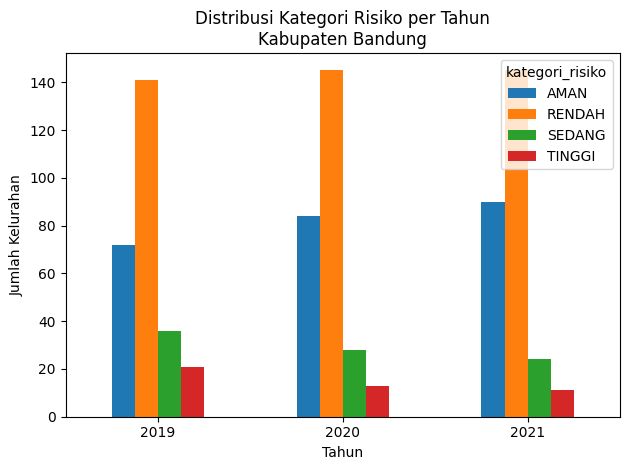

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
tab_kat_tahun.plot(kind="bar")

plt.title("Distribusi Kategori Risiko per Tahun\nKabupaten Bandung")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kelurahan")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [39]:
rank_kec_2021 = (
    risk_2021
    .groupby("bps_nama_kecamatan", as_index=False)
    .agg(
        jumlah_kelurahan=("bps_nama_desa_kelurahan", "nunique"),
        rata2_jenis_aktif=("jumlah_jenis_aktif", "mean"),
        max_jenis_aktif=("jumlah_jenis_aktif", "max")
    )
    .sort_values("rata2_jenis_aktif", ascending=False)
)

rank_kec_2021

,bps_nama_kecamatan,jumlah_kelurahan,rata2_jenis_aktif,max_jenis_aktif
1,BALEENDAH,3,2.666667,4
15,KATAPANG,7,2.571429,7
8,CILEUNYI,6,2.500000,5
25,PASEH,12,1.916667,5
5,CICALENGKA,12,1.916667,9
30,SOREANG,10,1.900000,5
23,PAMEUNGPEUK,6,1.833333,3
6,CIKANCUNG,9,1.666667,5
4,CANGKUANG,7,1.571429,3
28,RANCAEKEK,13,1.384615,6


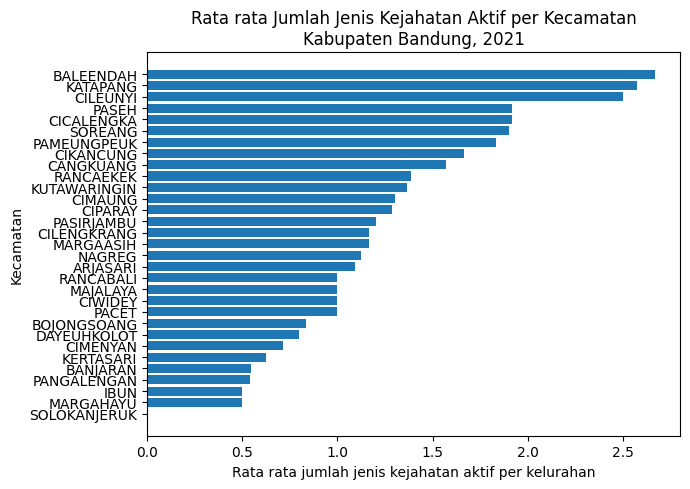

In [40]:
plt.figure(figsize=(7,5))

plt.barh(
    rank_kec_2021["bps_nama_kecamatan"],
    rank_kec_2021["rata2_jenis_aktif"]
)

plt.title("Rata rata Jumlah Jenis Kejahatan Aktif per Kecamatan\nKabupaten Bandung, 2021")
plt.xlabel("Rata rata jumlah jenis kejahatan aktif per kelurahan")
plt.ylabel("Kecamatan")
plt.gca().invert_yaxis()  # supaya yang tertinggi di atas
plt.tight_layout()
plt.show()

In [41]:
tren_kota.head()
tren_kota["jenis_kriminalitas"].unique()

array(['ANIAYA BERAT', 'ANIAYA RINGAN', 'CURANMOR R-2', 'CURANMOR R-4',
       'CURI BERAT', 'CURI BIASA', 'CURI KERAS', 'KORUPSI',
       'LAIN-LAIN KRIMINALITAAS', 'NARKOTIKA', 'PEMALSUAN MATA UANG',
       'PEMALSUAN MERK', 'PEMALSUAN SURAT', 'PEMBUNUHAN', 'PENADAHAN',
       'PENCULIKAN', 'PENGGELAPAN', 'PENGHINAAN', 'PENGRUSAKAN',
       'PENIPUAN', 'PERAS / ANC.KERAS', 'PERJUDIAN', 'PERKOSAAN',
       'PERZINAHAN', 'SENPI, HANDAK, SAJAM', 'SUMPAH PALSU'], dtype=object)

In [42]:
# total kumulatif per jenis
jenis_total = (
    tren_kota
    .groupby("jenis_kriminalitas", as_index=False)
    .agg(total=("total_kasus", "sum"))
    .sort_values("total", ascending=False)
)

jenis_total.head()

,jenis_kriminalitas,total
19,PENIPUAN,4471
8,LAIN-LAIN KRIMINALITAAS,3941
4,CURI BERAT,1796
16,PENGGELAPAN,1619
2,CURANMOR R-2,1605


In [43]:
top_jenis = jenis_total["jenis_kriminalitas"].head(5).tolist()
top_jenis

['PENIPUAN',
 'LAIN-LAIN KRIMINALITAAS',
 'CURI BERAT',
 'PENGGELAPAN',
 'CURANMOR R-2']

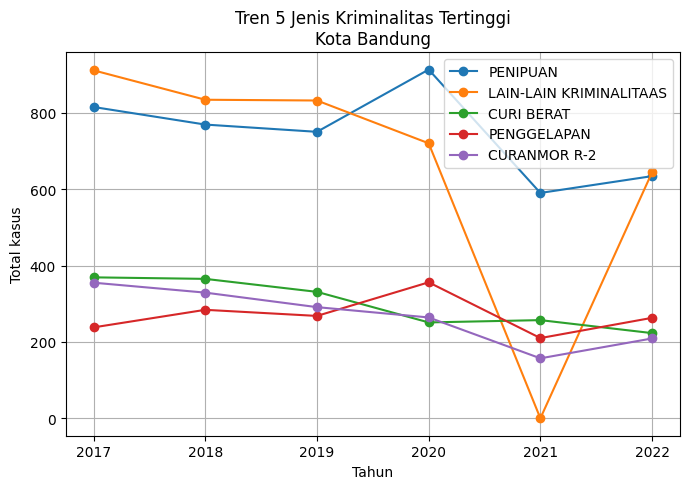

In [44]:
plt.figure(figsize=(7,5))

for jenis in top_jenis:
    subset = tren_kota[tren_kota["jenis_kriminalitas"] == jenis]
    subset = subset.sort_values("tahun")
    plt.plot(subset["tahun"], subset["total_kasus"], marker="o", label=jenis)

plt.title("Tren 5 Jenis Kriminalitas Tertinggi\nKota Bandung")
plt.xlabel("Tahun")
plt.ylabel("Total kasus")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
import geopandas as gpd
import pandas as pd
import os

DATA_RAW  = "data_raw"
DATA_PROC = "data_processed"

# 1. Baca risiko 2021 dan GeoJSON desa yang benar
risk_2021 = pd.read_csv(os.path.join(DATA_PROC, "kab_bandung_kelurahan_risk_2021.csv"))
gdf_desa  = gpd.read_file(os.path.join(DATA_RAW, "kab_bandung_desa_admin.geojson"))

print(gdf_desa.columns)
print(risk_2021.columns)

Index(['OBJECTID', 'NAMOBJ', 'SRS_ID', 'KDEPUM', 'KDPKAB', 'KDPPUM', 'TIPADM',
       'WADMKC', 'WADMKD', 'WADMKK', 'WADMPR', 'WIADKD', 'WIADKC', 'WIADKK',
       'WIADPR', 'SHAPE_Leng', 'SHAPE_Area', 'LUASHA', 'geometry'],
      dtype='object')
Index(['bps_kode_kecamatan', 'bps_nama_kecamatan', 'bps_kode_desa_kelurahan',
       'bps_nama_desa_kelurahan', 'tahun', 'jumlah_jenis_aktif',
       'kategori_risiko', 'ada_pencurian', 'ada_penipuan', 'ada_penganiayaan',
       'ada_pembakaran', 'ada_perkosaan',
       'ada_pengedar_penyalahgunaan_narkoba', 'ada_perjudian',
       'ada_pembunuhan', 'ada_perdagangan_manusia'],
      dtype='object')


In [48]:
def clean_name(s):
    if pd.isna(s):
        return ""
    s = str(s).upper().strip()
    s = s.replace("DESA ", "").replace("KELURAHAN ", "")
    return s

In [49]:
# sesuaikan dengan nama kolom di GeoJSON baru
gdf_desa["join_kec"]  = gdf_desa["WADMKC"].apply(clean_name)
gdf_desa["join_desa"] = gdf_desa["WADMKD"].apply(clean_name)

risk_2021["join_kec"]  = risk_2021["bps_nama_kecamatan"].apply(clean_name)
risk_2021["join_desa"] = risk_2021["bps_nama_desa_kelurahan"].apply(clean_name)

In [50]:
gdf_risk = gdf_desa.merge(
    risk_2021,
    on=["join_kec", "join_desa"],
    how="left"
)

gdf_risk[["join_kec", "join_desa", "jumlah_jenis_aktif", "kategori_risiko"]].head()

,join_kec,join_desa,jumlah_jenis_aktif,kategori_risiko
0,KERTASARI,NEGLAWANGI,1.0,RENDAH
1,KERTASARI,SANTOSA,0.0,AMAN
2,PANGALENGAN,WANASUKA,1.0,RENDAH
3,PANGALENGAN,SUKALUYU,1.0,RENDAH
4,PANGALENGAN,BANJARSARI,0.0,AMAN


In [51]:
risk_map = {"AMAN": 0, "RENDAH": 1, "SEDANG": 2, "TINGGI": 3}
gdf_risk["risk_level"]   = gdf_risk["kategori_risiko"].map(risk_map).fillna(0)
gdf_risk["danger_flag"]  = (gdf_risk["kategori_risiko"] == "TINGGI").astype(int)

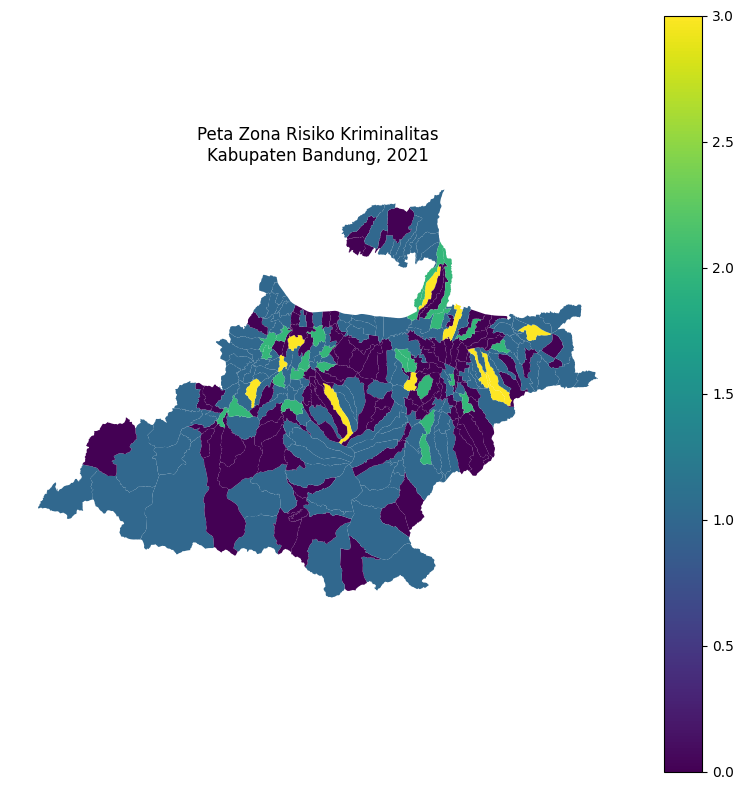

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
gdf_risk.plot(
    column="risk_level",
    legend=True,
    ax=ax
)
ax.set_title("Peta Zona Risiko Kriminalitas\nKabupaten Bandung, 2021")
ax.set_axis_off()
plt.tight_layout()
plt.show()